In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.linalg as la
import random
import math
from scipy.stats import norm
import scipy
from scipy.stats import multivariate_normal
#from functools import partial
#import scipy.stats as stats



In [2]:
'''
there are soem test for random walk
'''

'\ntest something\n'

In [307]:
# define a banana shape, 首先测试一下这个
def z(x_0,x_1):
    K = 100
    a=[K,1]   
    Cov = np.diag(a)
    #x = np.random.multivariate_normal((0,0),Cov)
    e = x_0
    f = x_1
    b = -0.03
    #x[1] = np.add(x[1],(0.03*(x[0]*x[0]-K))) # b = 0.03
    x_1 = np.add(x_1,(b*(x_0*x_0-K)))
    #x_0 = x_0 + e 
    #x_1 = x_1 + f
    yz = (multivariate_normal((0,0), Cov)).pdf([x_0,x_1]) 
    return x_0,x_1,yz

In [308]:
ax0_sample =[]
ax1_sample =[]
az_sample =[]
K = 100
a=[K,1]   
Cov =  np.array([[100,0],[0,1]])
#Cov

for i in range(8000):
    y = np.random.multivariate_normal((0,0),Cov) 
    x0,x1,zy = z(y[0],y[1])
    ax0_sample.append(x0)
    ax1_sample.append(x1)
    #ax0_sample.append(y[0])
    #ax1_sample.append(y[1])
    az_sample.append(zy)

#for i in range(1000):
   # print(y[i][0])

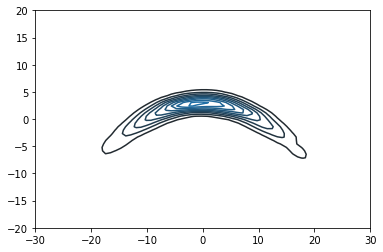

In [309]:
sns.kdeplot(ax0_sample, ax1_sample ) #,shade = True, cbar = True )
plt.axis([-30,30,-20,20])
pass

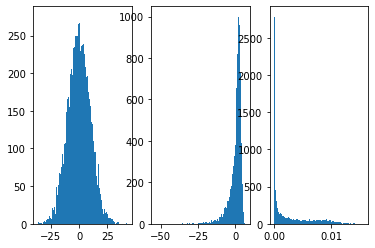

In [310]:
fig = plt.figure()
axx = fig.add_subplot(131)
axx.hist(ax0_sample, bins=100)

axx = fig.add_subplot(132)
axx.hist(ax1_sample, bins=100)

axx = fig.add_subplot(133)
axx.hist(az_sample, bins=100)

plt.show()

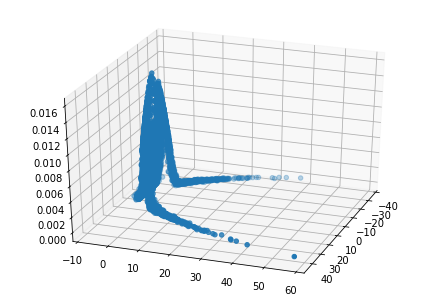

In [234]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(ax0_sample, ax1_sample, az_sample,marker='o')
plt.show()

In [283]:
# define a standard shape
def z(x_0,x_1):
    K = 100
    a=[K,1]   
    Cov = np.diag(a)
    ys = (multivariate_normal((0,0), Cov)).pdf([x_0,x_1])
    return ys

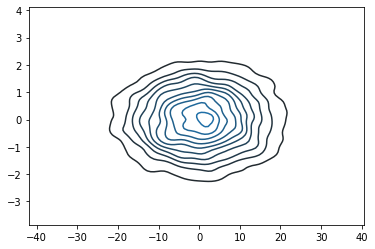

In [284]:
'''
K = 100
a=[1,1]   
Cov = np.diag(a)
ys = np.random.multivariate_normal((0,0),Cov,1000)
yz = (multivariate_normal((0,0), Cov)).pdf([ys[0],ys[1]])

'''
sigma = np.array([[100,0],[0,1]]) # 协方差
mu = np.zeros(2) # 生成 array([0., 0.])
ys = np.random.multivariate_normal(mu, sigma, 8000) # 生成满足此二维分布的样本对，这个里面有1000对

K = 100
a=[K,1]   
Cov = np.diag(a)
#ys = np.random.multivariate_normal((0,0),Cov,1000)
yz = []
for i in range (8000):
    yzs = (multivariate_normal((0,0), Cov)).pdf([ys[i][0],ys[i][1]])
    yz.append(yzs)

sns.kdeplot(ys[:,0], ys[:,1]) #,shade = True, cbar = True )
#plt.axis([-3.5,3.5,-3.5,3.5])
pass

In [211]:
np.shape(yz)

(8000,)

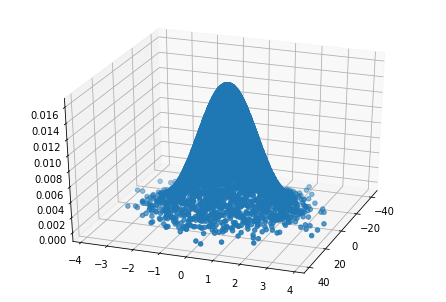

In [212]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(ys[:,0], ys[:,1], yz,marker='o')
plt.show()

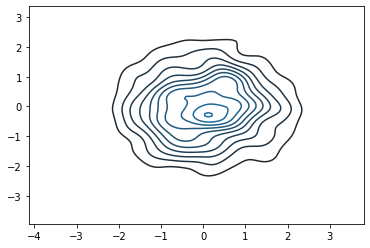

In [198]:
#plt.plot(ys[:,0], ys[:,1],"r.")
sns.kdeplot(ys[:,0], ys[:,1])


In [292]:
# test the standard shape
x=0
y=0

m = 400
n = 800

bx_sample =[]
by_sample =[]
bz_sample =[]
for t in range(0,m+n):
    x_1,y_1 = np.random.multivariate_normal(mean=[x,y], cov=[[100,0],[0,1]])
    #if 0< x_1 < xmax and 0 < y_1 < ymax:
    x_sample = x_1 
    y_sample = y_1
    
    accept_prob = min(1, z(x_sample,y_sample)/z(x,y) * 1.0)
    #print('accept_prob:',accept_prob)
    u = random.uniform(0, 1)
    #print('u:',u)
    #ax_sample.append(x_sample)
    #ay_sample.append(y_sample)

    if u < accept_prob: # 
        x = x_sample
        y = y_sample
        #print('x:,y:',x,y)

    if t >= m:
        bx_sample.append(x)
        by_sample.append(y)
        bz_sample.append(z(x,y))




In [291]:
#bx_sample[0]

-6.419034785825854

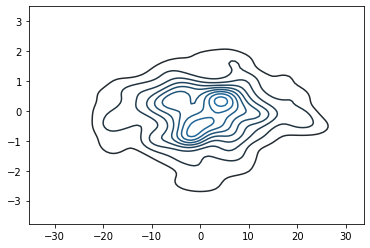

In [293]:
#plt.plot(bx_sample,by_sample,"r.")
sns.kdeplot(bx_sample, by_sample ) #,shade = True, cbar = True )
#plt.axis([-30,30,-10,10])
pass

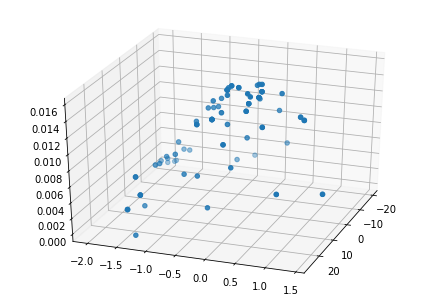

In [287]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(bx_sample, by_sample, bz_sample,marker='o')
plt.show()

In [311]:
# define a banana shape
def z(x_0,x_1):
    K = 100
    a=[K,1]   
    Cov = np.diag(a)
    #x = np.random.multivariate_normal((0,0),Cov)
    e = x_0
    f = x_1
    b = 0.03
    #x[1] = np.add(x[1],(0.03*(x[0]*x[0]-K))) # b = 0.03
    x_1 = np.add(x_1,(b*(x_0*x_0-K)))
    #x_0 = x_0 + e 
    #x_1 = x_1 + f
    yz = (multivariate_normal((0,0), Cov)).pdf([x_0,x_1]) 
    return yz

In [315]:
# test the banana shape
x=0
y=0

m = 4000
n = 8000

bx_sample =[]
by_sample =[]
bz_sample =[]
for t in range(0,m+n):
    x_1,y_1 = np.random.multivariate_normal(mean=[x,y], cov=[[100,0],[0,1]])
    #if 0< x_1 < xmax and 0 < y_1 < ymax:
    x_sample = x_1 
    y_sample = y_1
    
    accept_prob = min(1, z(x_sample,y_sample)/z(x,y) * 1.0)
    #print('accept_prob:',accept_prob)
    u = random.uniform(0, 1)
    #print('u:',u)
    #ax_sample.append(x_sample)
    #ay_sample.append(y_sample)

    if u < accept_prob: # 
        x = x_sample
        y = y_sample
        #print('x:,y:',x,y)

    if t >= m:
        bx_sample.append(x)
        by_sample.append(y)
        bz_sample.append(z(x,y))



        

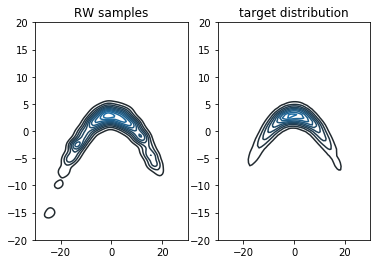

In [316]:
fig = plt.figure()
axx = fig.add_subplot(121)
#plt.plot(bx_sample,by_sample,"r.")
sns.kdeplot(bx_sample, by_sample ) #,shade = True, cbar = True )
axx.set_title('RW samples')
plt.axis([-30,30,-20,20])


axx = fig.add_subplot(122)
sns.kdeplot(ax0_sample, ax1_sample ) #,shade = True, cbar = True )
#plt.plot(bx_sample,by_sample,"r.")
axx.set_title('target distribution')
plt.axis([-30,30,-20,20])
pass

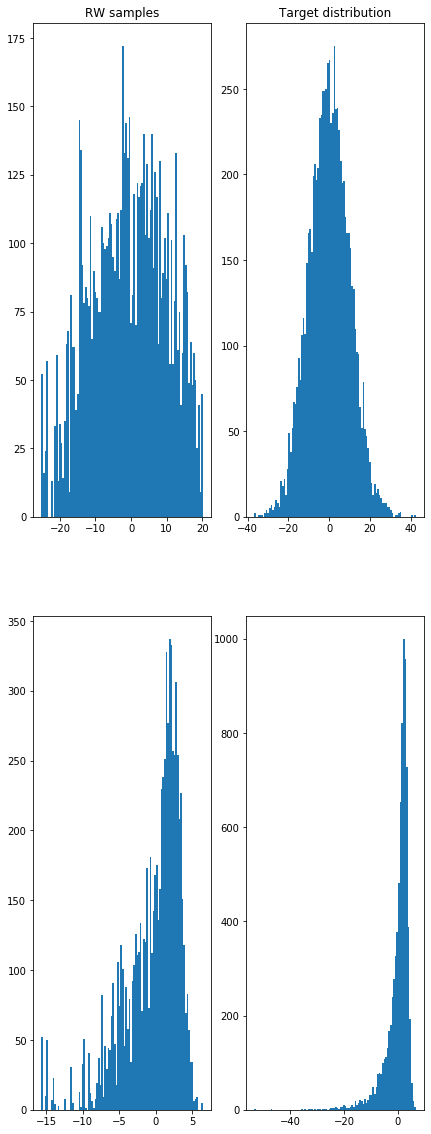

In [317]:
fig = plt.figure(figsize =(7,20))
axx = fig.add_subplot(221)
axx.hist(bx_sample, bins=100)
axx.set_title('RW samples')

axx = fig.add_subplot(222)
axx.hist(ax0_sample, bins=100)
axx.set_title('Target distribution')

axx = fig.add_subplot(223)
axx.hist(by_sample, bins=100)

axx = fig.add_subplot(224)
axx.hist(ax1_sample, bins=100)

plt.show()

In [ ]:
'''

End test for random walk
 
'''

In [21]:
0.08*(x[0]*x[0]-K)

-7.695696429090216

In [23]:
x[1] = np.add(x[1],(0.08*(x[0]*x[0]-K)))
x[1]


-7.319538968301274

In [22]:
x[1]+(0.08*(x[0]*x[0]-K))

-7.319538968301274

In [39]:
x = np.array([[1,2,3,12],[4,5,6,13],[7,8,9,14],[10,11,12,15]])
x

array([[ 1,  2,  3, 12],
       [ 4,  5,  6, 13],
       [ 7,  8,  9, 14],
       [10, 11, 12, 15]])

In [40]:
y_0 = x[...,0:1]
y_0

array([[ 1],
       [ 4],
       [ 7],
       [10]])

In [41]:
y_1 = x[...,1:2]
y_1

array([[ 2],
       [ 5],
       [ 8],
       [11]])

In [42]:
y_tail = x[...,2:-1]
y_tail

array([[ 3],
       [ 6],
       [ 9],
       [12]])

In [2]:
def s_topo(s_frame):
    a_topo = s_frame[10:210, 50:250]
    #a_topo = a
    aa_topo = 1.0/np.sum(a_topo) * a_topo # probability function,sum=1
    print(np.shape(aa_topo))
    
    plt.pcolormesh(aa_topo)
    plt.plot(20,100,'ro')
    plt.colorbar()
    return aa_topo

In [3]:
a = np.load ('gibbs_topo2.npy')

In [13]:
#file = np.load ('DEM_sandbox.npz')
#a = file['arr_2']

(200, 200)
11.069929374812796
9.919345093488895


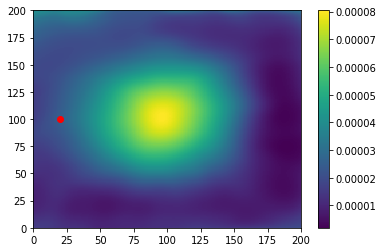

In [4]:
# first transform probability function to -log
final_topo = -np.log(s_topo(a)) # now final_topo is actually U(x)
print(final_topo[0][0])
print(final_topo[98][135])
#print(np.sum(final_topo))

In [5]:
# define an equation of a surface using four points,and return Ux
def S_U(a, frame): # give the position x[,]
    x = a[0] # position in x axis
    y = a[1] # position in y axis
    #用四个点来拟合一个曲面，求出曲面方程函数
# but remember that x_up,x_dowm,y_up,y_down cannot excced the whole frame
    x_up = int(np.ceil(x))
    x_down = int(np.floor(x))

    if x_up==x_down:
        x_up +=1

    y_up = int(np.ceil(y))
    y_down = int(np.floor(y))

    if y_up==y_down:
        y_up +=1

    points = np.array([[x_up,y_up],
                       [x_up,y_down],
                       [x_down,y_up],
                       [x_down,y_down]])
    values = np.array([frame[x_up][y_up],
                       frame[x_up][y_down],
                       frame[x_down][y_up],
                       frame[x_down][y_down]])
    inter = scipy.interpolate.LinearNDInterpolator(points,values)
    
    return inter(x,y)
    

In [11]:
#p_0 = norm.rvs(loc=0,scale=1,size=2)
#p_0

array([-0.88493063, -0.4850779 ])

In [6]:
# define sandbox gradient of potential energy

def S_d_U(a, frame):
    x = a[0] # position in x axis
    y = a[1] # position in y axis
    #print(x)
    #用四个点来拟合一个曲面，求出曲面方程函数
# but remember that x_up,x_dowm,y_up,y_down cannot excced the whole frame
    x_up = int(np.ceil(x))
    x_down = int(np.floor(x))

    if x_up==x_down:
        x_up +=1

    y_up = int(np.ceil(y))
    y_down = int(np.floor(y))

    if y_up==y_down:
        y_up +=1

    points = np.array([[x_up,y_up],
                       [x_up,y_down],
                       [x_down,y_up],
                       [x_down,y_down]])
    values = np.array([frame[x_up][y_up],
                       frame[x_up][y_down],
                       frame[x_down][y_up],
                       frame[x_down][y_down]])
    inter = scipy.interpolate.LinearNDInterpolator(points,values)
    
    
    x_ = inter(x_down, y)-inter(x_up, y)
    y_ = inter(x, y_down)-inter(x, y_up)

    dx = x_/(x_down-x_up)
    dy = y_/(y_down-y_up)
    
    return np.array([dx,dy])

In [7]:
# define Kinetic energy function
def K(p):
    KE = (p @ p)/2.0
    return KE

In [150]:
delta = 0.01 # 步长也是
nSamples = 200 # number of samples
L = 100 # leapfrog steps
x = np.zeros((nSamples,2)) # an array to save the postion
x_0 = np.array([100,100]) # initial position,这个位置也要选好
x[0] = x_0

xmax,ymax = np.shape(final_topo)
#inter = S_U(x[0],final_topo) # sandbox potenital energy function
#print(inter)
#print(x[0])

In [151]:
#a=np.array([0,0])
#b=S_d_U(a,final_topo)
#b

In [152]:
t = 0

while t < nSamples-1:
    t = t+1
    # sample random momentum
    p_0 = norm.rvs(loc=0,scale=1,size=2)
    
# simulate hamiltonian dynamics
    # momentum
    pStar = p_0
    # position/sample
    xStar = x[t-1]
    
   # print("before HMC:",xStar)
    
    # if the xStar[,] is inside the frame or not
    if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:
    
        # gradient
        gnew = S_d_U(xStar,final_topo)
    # leapfrog steps
        for j in range(L):
        # momentum,first half step of momentum
            pStar = pStar - delta/2.0 * gnew
        # postion/sample,first full step for position/sample
            xStar = xStar + delta * pStar
            
            if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2:   
            
            # find new gradient
                gnew = S_d_U(xStar,final_topo)
            # last half step
                pStar =pStar - delta /2.0 * gnew
            #print("after HMC:",xStar)
        
    # evaluate energy
        if 0<= xStar[0] < xmax-2 and 0 <= xStar[1] < ymax-2: 
            U_0 = S_U(x[t-1],final_topo)
            UStar = S_U(xStar,final_topo)

            K_0 = K(p_0)
            KStar = K(pStar)
        # acceptance
            alpha = min(1,np.exp(- UStar + U_0 - KStar + K_0))
            uc= random.uniform(0.6,1)

            if uc < alpha:
                x[t] = xStar
                #print('yes')
            else:
                x[t] = x[t-1]
                #print('no')


In [153]:
orbit_x = np.zeros((nSamples + 1,2))
orbit_x [0] = x_0 # initial position

for i in range (1,nSamples +1):
    orbit_x[i] = x[i-1]
    #print(i)

In [154]:
a_topo = a[10:210, 50:250]
aa_topo = 1.0/np.sum(a_topo) * a_topo # probability function,sum=1
#plt.pcolormesh(aa_topo)
#plt.colorbar()

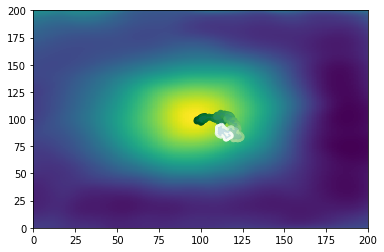

In [155]:
ax = plt.subplot(111)
#sns.kdeplot(orbit_x[:, 0], orbit_x[:, 1])
plt.pcolormesh(aa_topo)
plt.plot(orbit_x[:,0], orbit_x[:,1], alpha=0.2)
plt.scatter(orbit_x[:1,0], orbit_x[:1,1],  c='red', s=30) # print the initial position with color yellow
plt.scatter(orbit_x[1:,0], orbit_x[1:,1],  c=np.arange(nSamples)[::-1], cmap='Greens') # print other points
#ax.axis('square')
#plt.axis([-3.5,3.5,-3.5,3.5])
pass

In [12]:
#cov = np.array([[1.0,0.8],[0.8,1]])
#d_UE = S_d_U(x[0],final_topo)

In [14]:
#p_0 = norm.rvs(loc=0,scale=1,size=2)
#p_0

array([0.04572174, 0.43107604])

In [15]:
#p_0 = p_0 - delta/2.0 * d_UE
#p_0

array([0.04561488, 0.43075102])

In [13]:
#d_UE

array([0.02137126, 0.06500412])

In [18]:
a = np.zeros((4,3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
'''
test something, the np.gradient
'''

'\ntest something\n'

In [104]:
# define potenital energy function
def U_1(x, cov):
    cov_1 = la.inv(cov)
    UE= (x @ cov_1 @ x)/2.0 
    return UE

In [111]:
from scipy.stats import multivariate_normal

In [122]:
#samplesource = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]], 100)

In [126]:
np.random.seed(12345)

In [139]:
sigma = np.array([[1,0],[0,1]]) # 协方差
mu = np.zeros(2) # 生成 array([0., 0.])
ys = np.random.multivariate_normal(mu, sigma, 100)

In [140]:
np.shape(ys)

(100, 2)

[-3.5, 3.5, -3.5, 3.5]

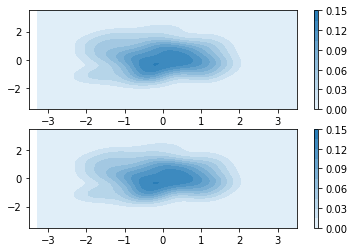

In [141]:
ax = plt.subplot (211)
sns.kdeplot(ys[:,0], ys[:,1],shade = True, cbar = True )
plt.axis([-3.5,3.5,-3.5,3.5])
pass

ax = plt.subplot (212)

sns.kdeplot(ys[:,0], ys[:,1],shade = True, cbar = True )
plt.axis([-3.5,3.5,-3.5,3.5])

In [100]:
#samplesource.pdf([1,1])

In [101]:
#np.log(2*np.pi)

In [106]:
s_U = -np.log(samplesource.pdf([1,1]))
s_U

2.8378770664093453

In [107]:
r_U = U_1([1,1], cov)
r_U

1.4744940887602285

In [87]:
np.shape(x)

(100, 2)

In [135]:
UE_x = np.zeros(100)
d_UEx = np.zeros((100,2))
d_x = np.zeros((100,2))

In [136]:
for i in range (100):
    UE_x[i] = U(x[i],cov)
    d_UEx[i] = d_U(x[i], cov)
    d_x[i] = np.gradient(x[i])

In [137]:
np.shape(UE_x)

(100,)

In [48]:

#d_x = np.gradient(x)

In [52]:
np.shape(d_x)

(100, 2)

In [56]:
np.log(10)

2.302585092994046

In [6]:
'''
test end
'''

In [4]:
# define Kinetic energy function

def K(p):
    KE = (p @ p)/2.0
    return KE

In [5]:
delta = 0.01
nSamples = 100 # number of samples
L = 100 # leapfrog steps
x = np.zeros((nSamples,2))

In [6]:
x_0 = np.array([-3,3]) # initial position
x[0] = x_0
cov = np.array([[1.0,0.8],[0.8,1]])

In [10]:
t = 0

while t < nSamples:
    t = t+1
    # sample random momentum
    p_0 = norm.rvs(loc=0,scale=1,size=2)
    
# simulate hamiltonian dynamics
    # momentum
    pStar = p_0
    # position/sample
    xStar = x[t-1]
    # gradient
    gnew = d_U(xStar,cov)
# leapfrog steps
    for j in range(L):
    # momentum,first half step of momentum
        pStar = pStar - delta/2.0 * gnew
    # postion/sample,first full step for position/sample
        xStar = xStar + delta * pStar
    # find new gradient
        gnew = d_U(xStar,cov)
    # last half step
        pStar =pStar - delta /2.0 * gnew

# evaluate energy

    U_0 = U(x[t-1],cov)
    UStar = U(xStar,cov)
    
    K_0 = K(p_0)
    KStar = K(pStar)
# acceptance
    alpha = min(1,np.exp(- UStar + U_0 - KStar + K_0))
    uc= random.uniform(0,1)
    
    if uc < alpha:
        x[t] = xStar
    else:
        x[t] = x[t-1]
    

In [11]:
orbit_x = np.zeros((nSamples + 1,2))
orbit_x [0] = x_0 # initial position

for i in range (1,nSamples +1):
    orbit_x[i] = x[i-1]
    #print(i)

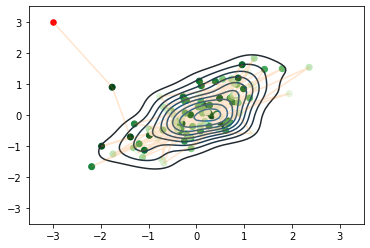

In [12]:
ax = plt.subplot(111)
sns.kdeplot(orbit_x[:, 0], orbit_x[:, 1])
plt.plot(orbit_x[:,0], orbit_x[:,1], alpha=0.2)
plt.scatter(orbit_x[:1,0], orbit_x[:1,1],  c='red', s=30) # print the initial position with color yellow
plt.scatter(orbit_x[1:,0], orbit_x[1:,1],  c=np.arange(nSamples)[::-1], cmap='Greens') # print other points
#ax.axis('square')
plt.axis([-3.5,3.5,-3.5,3.5])
pass

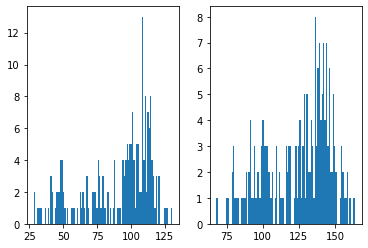

In [143]:
fig = plt.figure()
axx = fig.add_subplot(121)
axx.hist(orbit_x[:, 0], bins=100)

axx = fig.add_subplot(122)
axx.hist(orbit_x[:, 1], bins=100)

plt.show()